<a href="https://colab.research.google.com/github/tanaymukherjee/PB_2021_internal/blob/main/PB_Challenge_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pitney Bowes Challenge

### Team Members:

1. Amulya Singh
2. Chau Hoang
3. Shani Batat
4. Tanay Mukherjee

### Part A: Loading all packages and libraries

In [1]:
#!pip install <name of any package that's not loaded already in your system>

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Standard operating libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# For EDA
import dabl

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Split a dataset into train and test sets
from sklearn.model_selection import train_test_split

# Machine learning 
import sklearn.ensemble as ske
from sklearn.model_selection import cross_val_score
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Classification metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

### Part B: Loading file from dropbox

In [6]:
# Google Colaboratory with dropbox
# Load the training set
# We need to run it only once
!wget -O train.csv https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv?dl=0

--2021-04-13 07:59:54--  https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv [following]
--2021-04-13 07:59:54--  https://www.dropbox.com/sh/raw/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc48f363400d15c7144fa181df45.dl.dropboxusercontent.com/cd/0/inline/BMihmM0BWiYVmV2yA3AWM9MoyVav4zoBtevEmuxKB1cRAnJ2EDd0LEm6ymsIc3jzyeq5ZBYqfxZfWmUErNGZUp5XIUerSI5amhDQaZ2QtH8ViD74xr66CTgpfcA0VNezjKQBzuLtZNakIykd66X1Dplj/file# [following]
--2021-04-13 07:59:55--  https://uc48f363400d15c7144fa181df45.dl.dropboxusercontent.com/cd/0/inline/BMihmM0BWiYVm

In [7]:
# Google Colaboratory with dropbox
# Read the test set
# We need to run it only once
!wget -O test.csv https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv?dl=0

--2021-04-13 07:59:58--  https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv [following]
--2021-04-13 07:59:58--  https://www.dropbox.com/sh/raw/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca94a3dd73cfcbe2030b093e0fb.dl.dropboxusercontent.com/cd/0/inline/BMjVpp5tIOKFyvczUSc9ugPm5pJm8E9CfemDwMo8Og_TJQGKwKkBm9lf2BNLR4mWYPdZ9Kcb3EcTqv6hQ3lhIhcgZa5aUG5gosjtS0U9Rj-PyeQnGVtLz0Vu68a1i4y3SSPZsryUC-EChjF-Fsw2hs8d/file# [following]
--2021-04-13 07:59:58--  https://uca94a3dd73cfcbe2030b093e0fb.dl.dropboxusercontent.com/cd/0/inline/BMjVpp5tIOKFyvcz

### Part C: Data Pre-processing

In [8]:
# Check the path of the files
!ls -ahl "/content"

total 18M
drwxr-xr-x 1 root root 4.0K Apr 13 07:59 .
drwxr-xr-x 1 root root 4.0K Apr 13 07:57 ..
drwxr-xr-x 4 root root 4.0K Apr  7 13:35 .config
drwxr-xr-x 1 root root 4.0K Apr  7 13:36 sample_data
-rw-r--r-- 1 root root 1.8M Apr 13 07:59 test.csv
-rw-r--r-- 1 root root  16M Apr 13 07:59 train.csv


In [9]:
# Read the training dataset
df = pd.read_csv("/content/train.csv")

In [10]:
# Read the test dataset
df_test = pd.read_csv('/content/test.csv')

#### Training dataset

In [11]:
# File info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [12]:
# To print top 10 records from the file
df.head(10)

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0,False,4.99,5.85,24.35,31.02,43.42,79.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/2021,10/6/2019
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,NaN,NaN,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/2021,10/27/2019
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/2021,10/31/2019
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/2021,10/1/2019
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,0,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/2021,9/13/2019
5,30054,27.74,5.12,42.39,5.46,0.076667,-0.020000,45.90,3.99,75.64,4.36,-0.023333,0.040000,0,False,4.35,4.21,47.38,88.32,4.60,4.54,4.94,4.65,37.91,76.00,5.93,4.46,5.09,5.03,5.48,4.18,4.64,4.19,4.98,3.36,-0.360000,-0.143333,0.573333,0.800000,0.396667,0.036667,0.326667,100.900000,100.550000,10.700000,2.150000,350.345500,346.747500,12.878500,19.621000,4151.600000,6.375000,32.499500,4/1/2021,10/5/2019
6,26431,4.67,5.32,23.99,4.62,0.270000,-0.010000,3.56,4.62,18.57,3.74,-0.350000,-0.010000,0,False,4.76,3.46,5.63,4.29,6.21,5.14,24.89,49.26,5.31,5.37,25.47,43.57,25.92,40.73,37.76,57.95,20.04,35.44,4.42,4.19,-0.026667,-0.446667,4.236667,-0.010000,0.020000,0.016667,5.963333,72.130435,71.869565,60.304348,1.956522,358.789130,353.025652,17.384783,27.495217,4170.652174,20.500000,44.880000,4/1/2021,9/13/

In [13]:
# Records - rows and columns
df.shape

(40500, 55)

In [14]:
# Summarize the data for each feature
df.describe(include='all')

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
count,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500,40500.000000,40500.000000,40493.000000,40493.000000,40472.000000,40472.000000,40338.000000,40338.000000,40126.000000,40126.000000,39703.000000,39703.000000,38914.000000,38914.000000,37743.000000,37743.000000,36118.000000,36118.000000,33832.000000,33832.000000,40500.000000,40500.000000,40498.000000,40469.000000,40500.000000,40500.000000,40498.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500,40500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,164
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/1/2021,9/20/2019
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40500,877
mean,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,26.081209,-0.094954,-0.114921,0.232123,NaN,16.343948,26.082150,16.334986,26.058893,16.344544,26.081712,16.388239,26.128528,16.315824,26.062368,16.364712,26.101246,16.579682,26.558981,16.555553,26.529755,16.410888,26.229872,16.498667,26.357605,-0.108077,-0.100143,-0.089712,-0.118265,-0.039316,-0.038808,-0.047330,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462,NaN,NaN
std,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,28.996887,1.270488,1.324977,0.422193,NaN,15.208344,29.158269,15.196900,29.139730,15.146648,29.057013,15.137835,28.941077,14.954684,28.713222,14.935286,28.616522,14.988169,28.810316,14.917026,28.637583,14.805712,28.365960,14.826322,28.323536,1.385724,1.373807,1.322062,1.375731,0.720808,0.787685,0.818219,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011,NaN,NaN
min,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,0.000000,NaN,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.760000,0.370000,-58.820000,-61.173333,-29.996667,-

In [15]:
# Correlation table
df.corr(method='pearson')

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
deviceid,1.000000,0.004142,-0.001142,0.002691,0.003504,-0.004674,-0.001521,0.004854,-0.000761,0.002166,0.004750,-0.007265,0.002634,-0.004251,0.000475,-0.004359,-0.002377,-0.004506,-0.004438,-0.000596,-0.001011,0.001588,0.000365,0.002816,0.004019,-0.003043,-0.002586,-0.004631,-0.002813,0.005479,0.004108,-0.005070,-0.004088,0.000988,-0.001249,0.007709,0.002769,-0.004402,-0.007273,-0.000034,0.003283,-0.002331,0.000911,0.000777,0.009035,-0.002188,0.001162,-0.000333,0.000704,0.001197,0.000564,-0.002132,0.001033
avg_time_charging_lag1,0.004142,1.000000,0.001707,0.001525,-0.005240,0.011670,-0.003474,0.979988,0.001834,0.001580,-0.005232,0.009126,-0.001647,-0.014580,-0.004235,0.000620,0.001160,-0.005266,-0.005822,-0.006620,-0.006738,-0.001907,-0.001947,-0.000118,-0.001578,0.002459,0.002842,-0.002732,-0.003305,-0.005181,-0.004096,-0.006153,-0.004673,0.008429,0.008271,-0.051579,-0.001434,-0.002997,0.002863,0.057934,-0.006162,0.000509,-0.192945,-0.192962,-0.010313,-0.022071,-0.067691,-0.080069,0.241628,0.235666,-0.086113,-0.001742,0.238768
avg_time_charging_lag2,-0.001142,0.001707,1.000000,-0.010682,-0.000641,-0.000856,-0.000638,0.001050,0.980808,-0.009903,0.000053,0.000430,-0.004200,-0.003520,0.002940,-0.004350,-0.004710,0.004742,0.002958,-0.000284,-0.000026,-0.000321,-0.001353,0.002342,0.005049,0.003042,0.002544,0.003173,0.003806,0.003829,0.002761,-0.007410,-0.007403,-0.003745,-0.005440,0.002864,-0.020310,-0.004661,0.004020,-0.002653,0.057512,0.006660,-0.193247,-0.193316,-0.006186,-0.007043,-0.074024,-0.088043,0.242112,0.236300,-0.090766,0.010125,0.239353
avg_time_charging_lag3,0.002691,0.001525,-0.010682,1.000000,-0.005379,-0.001756,-0.002851,0.001107,-0.012405,0.981309,-0.005899,-0.004590,-0.000372,-0.001927,-0.002643,0.000967,0.001910,0.002626,0.003138,-0.006502,-0.005704,0.002673,0.003952,0.006199,0.006418,-0.004176,-0.004275,0.004701,0.004396,-0.003477,-0.002539,0.001963,0.003229,-0.003530,-0.003750,0.004181,-0.002073,-0.010424,0.006534,0.004819,0.000220,0.044430,-0.199668,-0.199595,-0.009667,-0.000146,-0.072953,-0.084776,0.242527,0.238656,-0.089027,0.011651,0.241052
avg_time_charging_lag7,0.003504,-0.005240,-0.000641,-0.005379,1.000000,-0.004053,-0.000357,-0.006494,0.001475,-0.004824,0.981128,-0.012199,0.004841,0.006221,0.004366,-0.001249,-0.001071,-0.001183,-0.001334,0.010348,0.008811,0.003174,0.003360,-0.004202,-0.002683,0.000376,0.001260,-0.002459,-0.002987,-0.002962,-0.004051,-0.004191,-0.004298,-0.009464,-0.008424,-0.000101,-0.001315,0.000033,-0.005085,-0.006233,0.008055,-0.007157,-0.189334,-0.189267,-0.010842,-0.016543,-0.070883,-0.082705,0.233331,0.229206,-0.089236,-0.001513,0.231647
charging_rate_lag3,-0.004674,0.011670,-0.000856,-0.001756,-0.004053,1.000000,0.005428,0.010883,-0.000590,-0.002937,-0.003823,0.250725,-0.002565,0.025426,0.025354,0.001768,0.002564,0.007822,0.007928,-0.006

### Part D: Data Wrangling

In [16]:
# Check for total null values
df.isnull().values.sum()

33713

In [17]:
# Null or NAs by column
naColumns = df.isnull().sum()

# Sort features in ascending order with no. of NAs
naColumns.sort_values()

deviceid                          0
discharging_rate_lag5             0
charging_rate_lag4                0
charging_rate_lag5                0
chargecycles                      0
dischargecycles                   0
total_off_time                    0
discharging_rate_lag4             0
number_times_restart              0
avg_volt_change_discharging       0
avg_time_charging                 0
avg_time_discharging              0
max_voltage_day                   0
piececount                        0
cycle_time                        0
avg_volt_change_charging          0
LastRecord                        0
Date Deployed                     0
charge_cycle_time_below_12        0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
charging_rate_lag3                0
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
discharging_rate_lag3             0
avg_time_discharging_lag4   

Text(0.5, 0, 'Top 20 features with missing values')

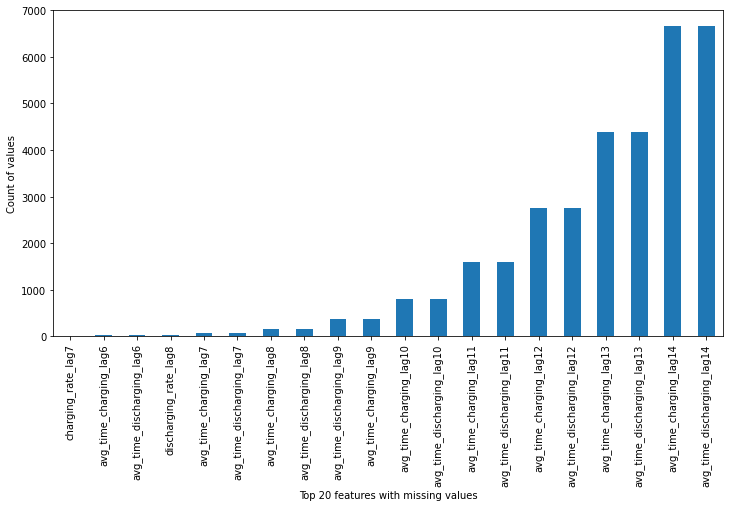

In [19]:
x = naColumns.sort_values().tail(20)

# Plot the count of missing NA values by features
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 features with missing values')

In [20]:
# Fill the missing NAs for rows now
def filling(df):
    for i in df:
        if df[i].dtypes == object:
            # The non-numerical ones to be replaced by the most common occurences
            fill = df[i].mode().iat[0]
            df.loc[:,i] = df[i].replace(np.nan,fill)
        else:
            # The numeric ones will be replaces by median values for the fature
            the_mean = df[i].median(skipna=True)
            df.loc[:,i] = df[i].replace(np.nan,the_mean)

filling(df)

In [21]:
# Check - should show no more NAs
df.isnull().values.sum()

0

### Part E: Exploratory Data Analysis

In [22]:
# Checking for feature type
types = dabl.detect_types(df)
print(types)

                             continuous  dirty_float  ...  free_string  useless
deviceid                           True        False  ...        False    False
avg_time_charging_lag1             True        False  ...        False    False
avg_time_charging_lag2             True        False  ...        False    False
avg_time_charging_lag3             True        False  ...        False    False
avg_time_charging_lag7             True        False  ...        False    False
charging_rate_lag3                 True        False  ...        False    False
charging_rate_lag7                 True        False  ...        False    False
avg_time_discharging_lag1          True        False  ...        False    False
avg_time_discharging_lag2          True        False  ...        False    False
avg_time_discharging_lag3          True        False  ...        False    False
avg_time_discharging_lag7          True        False  ...        False    False
discharging_rate_lag3              True 

Target looks like classification
Showing only top 10 of 51 continuous features
Linear Discriminant Analysis training set score: 0.501


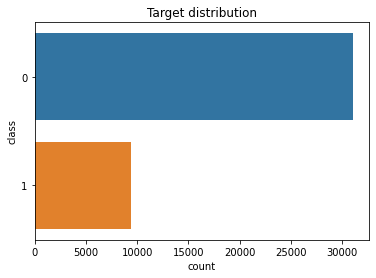

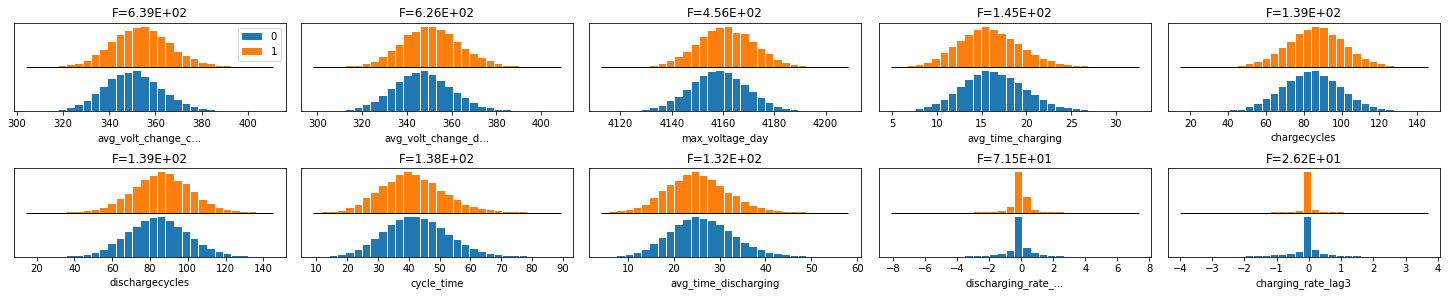

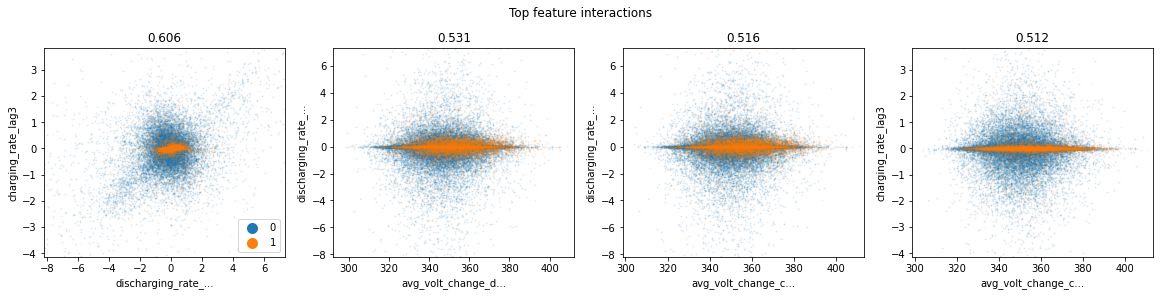

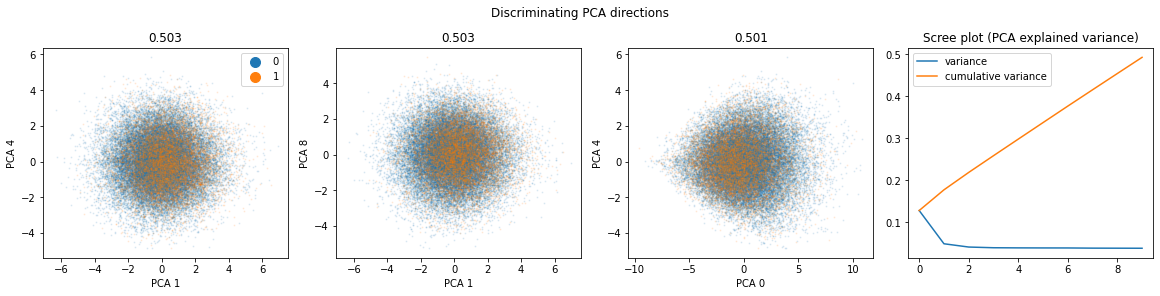

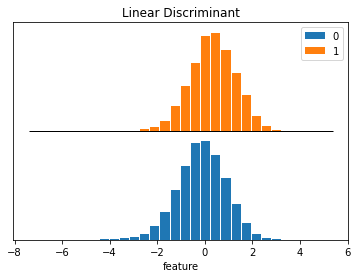

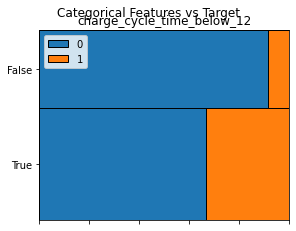

In [23]:
# What do we have for our y variable - 'fail_7'
# Dabl is an intuitive package that tells us if the task is a classification or regression
dabl.plot(df, target_col="fail_7")

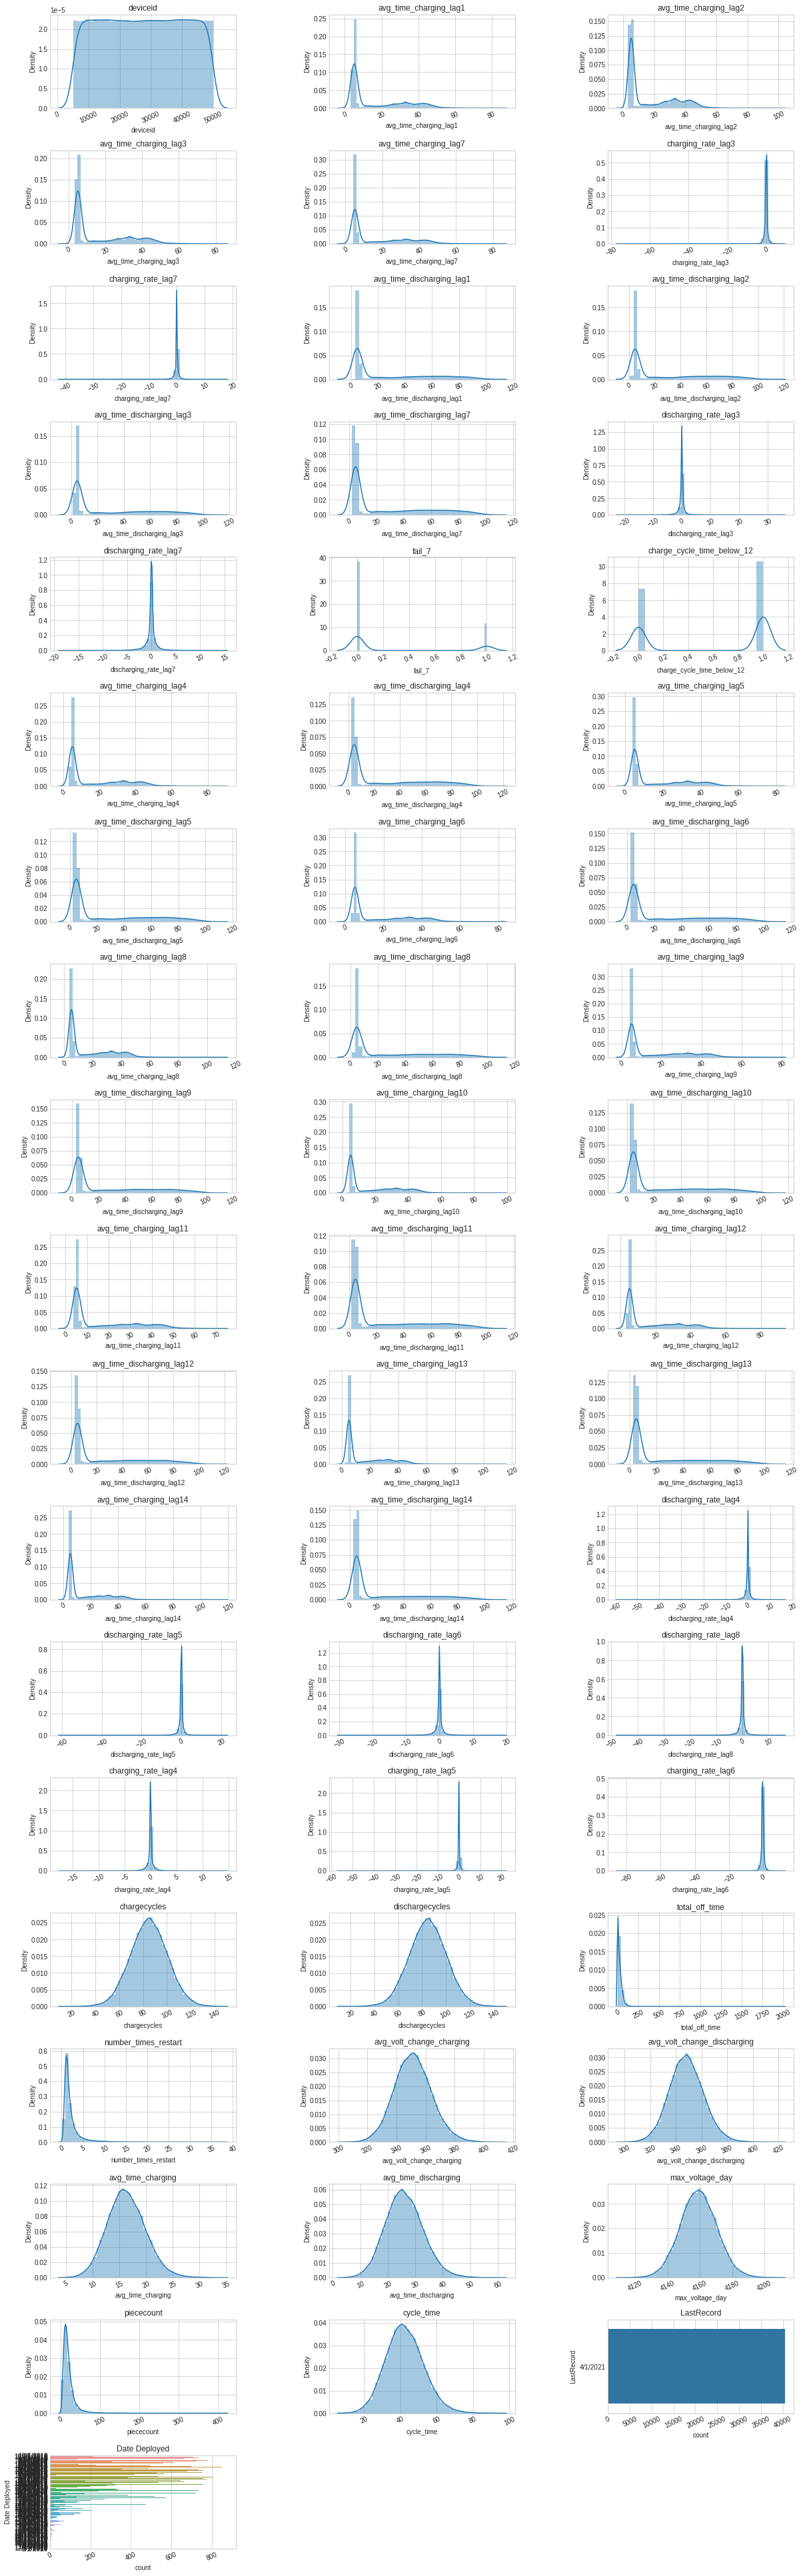

In [24]:
# Plotting the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=70, hspace=0.45, wspace=0.5)

In [25]:
# Dropping the features which are of object type but have no use in the feature selection or modeling
del df['LastRecord']
del df['Date Deployed']

### Part F: Featured Engineering

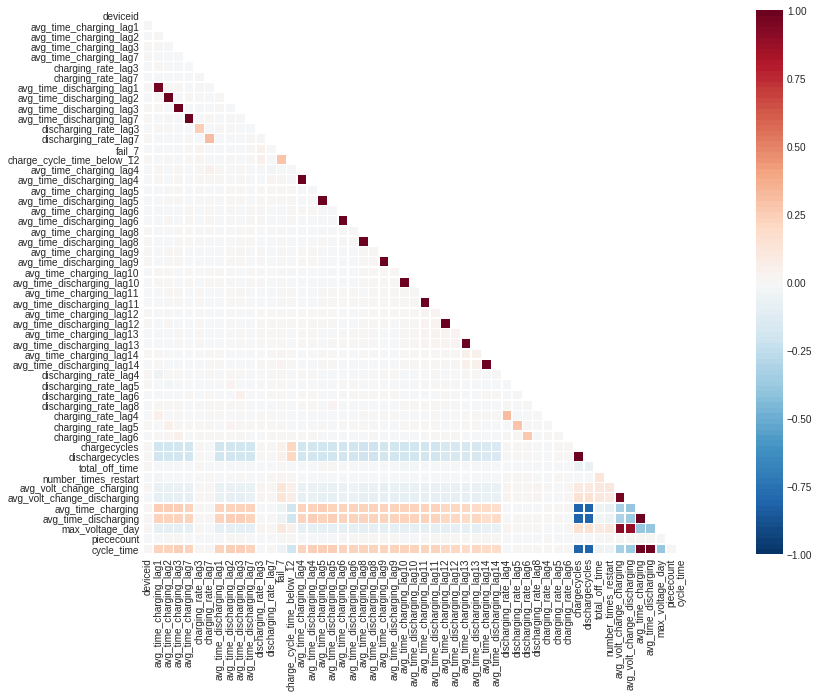

In [26]:
# Creating a correlation plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

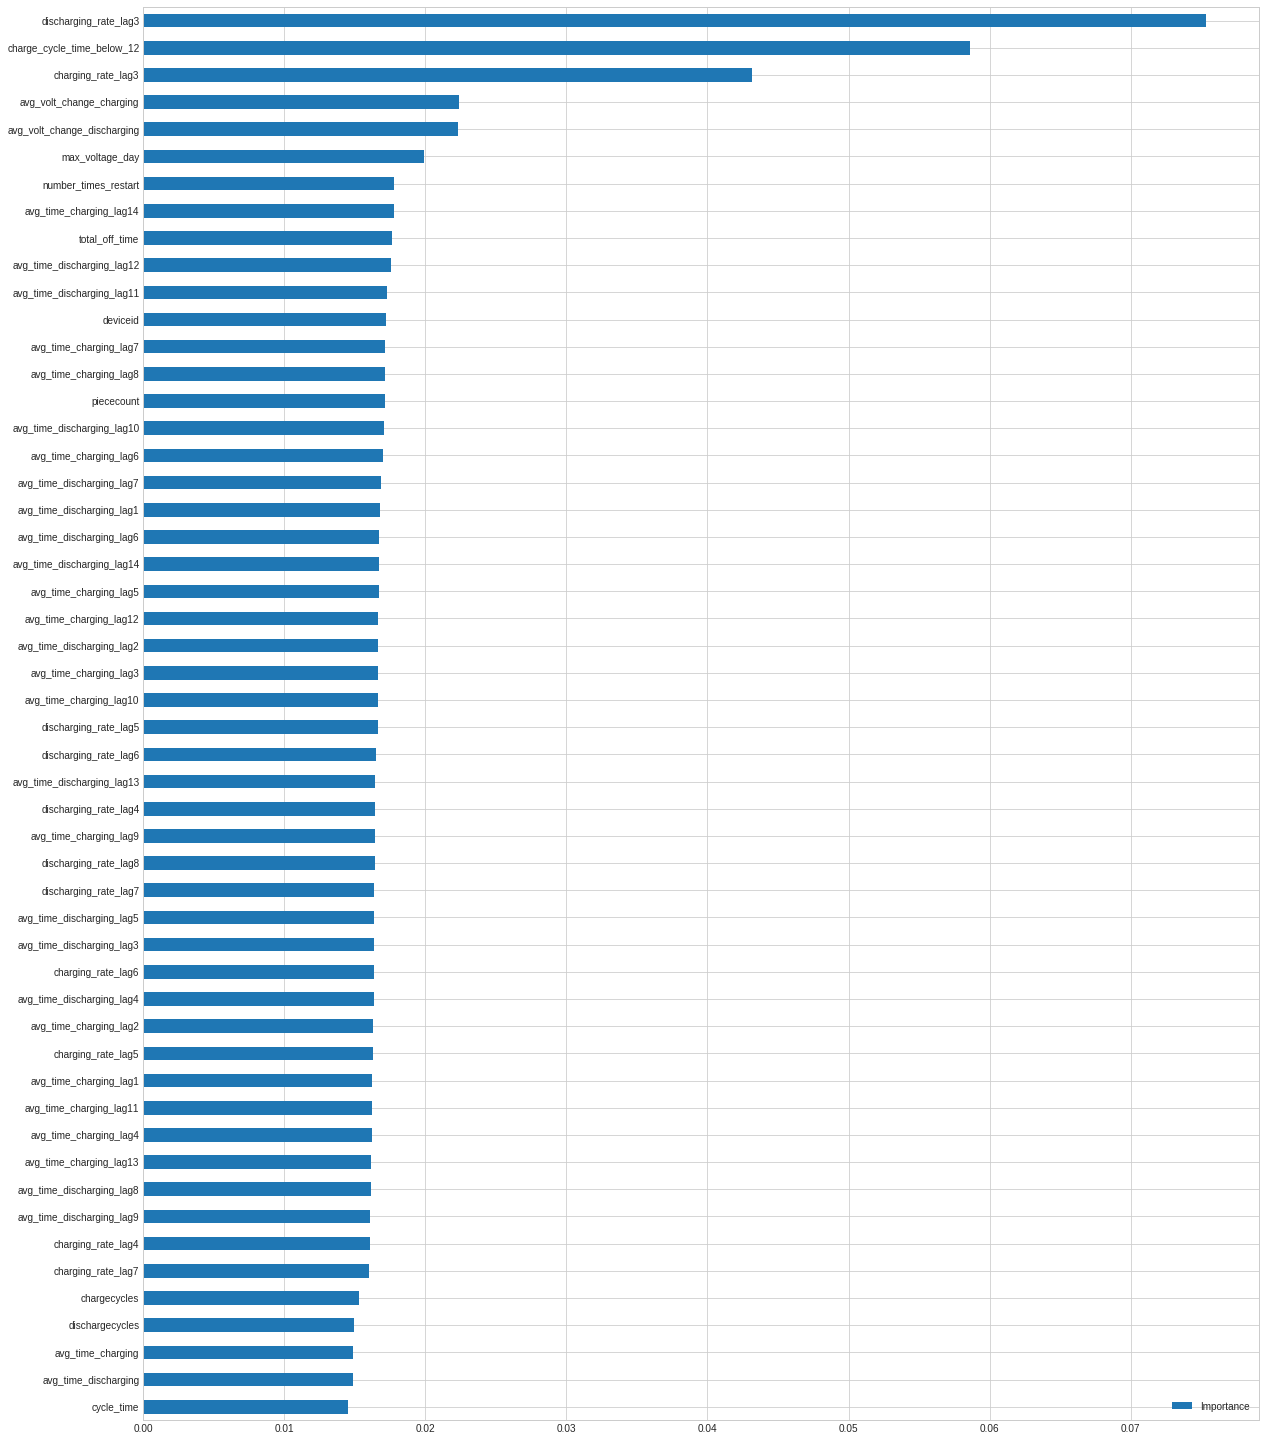

In [27]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('fail_7', axis=1), df['fail_7'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('fail_7', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

<BarContainer object of 52 artists>

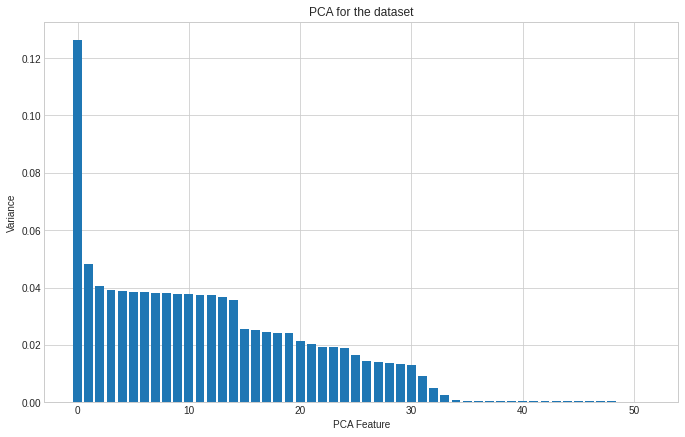

In [28]:
# Calculating PCA for dataset, and graphing the Variance for each feature
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
pca1 = PCA(n_components=len(df.columns)-1)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for the dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_)

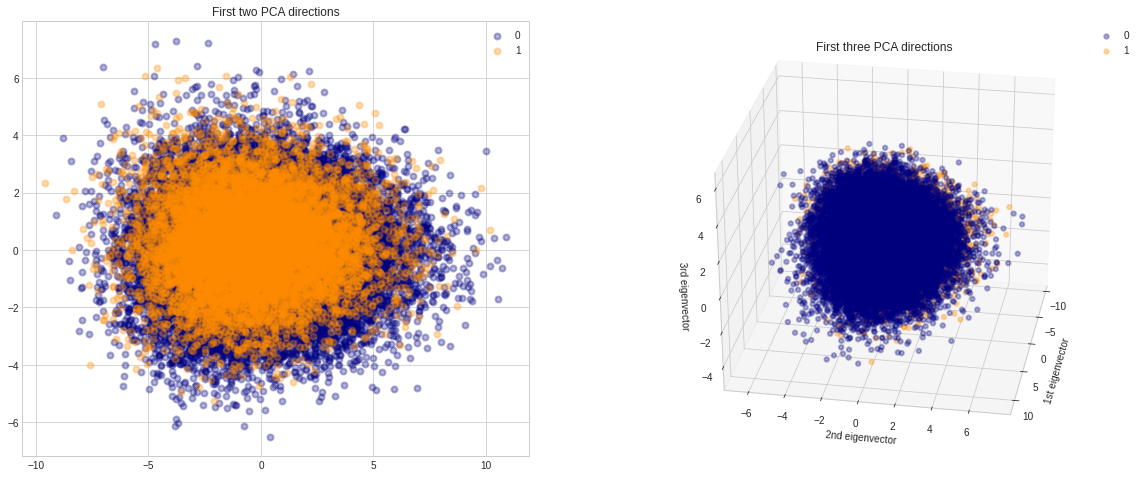

In [29]:
# PCA's components graphed in 2D and 3D

# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
y = df['fail_7']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3

# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# Rotate the axes
ax.view_init(30, 10)

### Part G: Machine Learning - Model Preparation

In [31]:
# Split a dataset into train and validation sets
# NOTE: We are not calling it test set because that is separately shared for prediction
X = df.drop ('fail_7', axis=1)
y = df['fail_7']

# Split into train and validation sets
# We are calling it test here but that's just for nomenclature purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [32]:
# Records - rows and columns for train and test after the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36450, 52) (36450,)
(4050, 52) (4050,)


In [33]:
# Setting a random seed will guarantee we get the same results every time we run our training and testing.
random.seed(1)

In [34]:
# calculate the FPR and TPR for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [35]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [36]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 17.98 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 5.459762073728654e-09, 'class_weight': None, 'C': 2.836255000138707e-13}

Model with rank: 2
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 69579.97180449084, 'class_weight': None, 'C': 524169741709692.3}

Model with rank: 3
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 214502887777118.66, 'class_weight': None, 'C': 1.4791662932317575}

Model with rank: 4
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 16.987247418078063, 'class_weight': None, 'C': 2084164015.2677333}

Model with rank: 5
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 7.582073302229701e+17, 'class_weight': None, 'C': 15.492411070800944}



### Part H: Machine Learning - Model Execution

In [38]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 76.59
Accuracy CV 10-Fold: 76.77
Running Time: 0:00:11.127689


In [39]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_log))
print(metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     27992
           1       0.42      0.00      0.01      8458

    accuracy                           0.77     36450
   macro avg       0.60      0.50      0.44     36450
weighted avg       0.69      0.77      0.67     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3107
           1       0.27      0.00      0.01       943

    accuracy                           0.77      4050
   macro avg       0.52      0.50      0.44      4050
weighted avg       0.65      0.77      0.67      4050



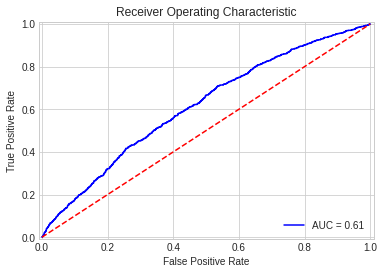

In [40]:
plot_roc_curve(y_test, probs_log)

In [41]:
# K-Nearest Neighbors (KNN)
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 70.07
Accuracy CV 10-Fold: 70.03
Running Time: 0:00:44.116205


In [42]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_knn))
print(metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     27992
           1       0.23      0.13      0.16      8458

    accuracy                           0.70     36450
   macro avg       0.50      0.50      0.49     36450
weighted avg       0.64      0.70      0.67     36450

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      3107
           1       0.24      0.14      0.17       943

    accuracy                           0.70      4050
   macro avg       0.51      0.50      0.50      4050
weighted avg       0.65      0.70      0.67      4050



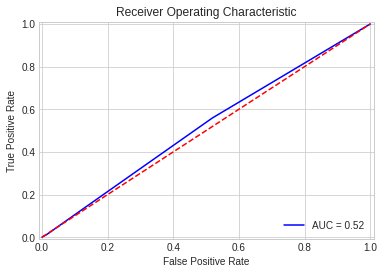

In [43]:
plot_roc_curve(y_test, probs_knn)

In [44]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 59.38
Accuracy CV 10-Fold: 60.43
Running Time: 0:00:02.072506


In [45]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_gaussian))
print(metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.85      0.59      0.70     27992
           1       0.33      0.66      0.44      8458

    accuracy                           0.60     36450
   macro avg       0.59      0.62      0.57     36450
weighted avg       0.73      0.60      0.64     36450

              precision    recall  f1-score   support

           0       0.85      0.57      0.68      3107
           1       0.32      0.66      0.43       943

    accuracy                           0.59      4050
   macro avg       0.58      0.62      0.56      4050
weighted avg       0.72      0.59      0.63      4050



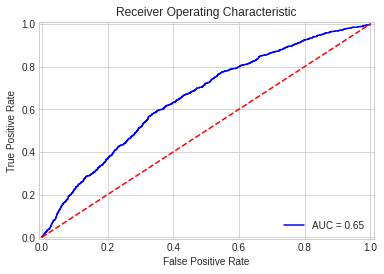

In [46]:
plot_roc_curve(y_test, probs_gau)

In [47]:
# Linear Support Vector Classification (SVC)
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 73.21
Accuracy CV 10-Fold: 66.44
Running Time: 0:02:28.535998


In [48]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_svc))
print(metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79     27992
           1       0.24      0.20      0.22      8458

    accuracy                           0.66     36450
   macro avg       0.50      0.50      0.50     36450
weighted avg       0.65      0.66      0.65     36450

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      3107
           1       0.31      0.12      0.18       943

    accuracy                           0.73      4050
   macro avg       0.54      0.52      0.51      4050
weighted avg       0.67      0.73      0.69      4050



In [49]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 58.35
Accuracy CV 10-Fold: 50.39
Running Time: 0:00:32.185584


In [50]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_sgd))
print(metrics.classification_report(y_test, test_pred_sgd))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60     27992
           1       0.24      0.53      0.33      8458

    accuracy                           0.50     36450
   macro avg       0.51      0.51      0.47     36450
weighted avg       0.65      0.50      0.54     36450

              precision    recall  f1-score   support

           0       0.81      0.60      0.69      3107
           1       0.29      0.53      0.37       943

    accuracy                           0.58      4050
   macro avg       0.55      0.57      0.53      4050
weighted avg       0.69      0.58      0.61      4050



In [51]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 71.93
Accuracy CV 10-Fold: 71.33
Running Time: 0:00:33.424302


In [52]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_dt))
print(metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     27992
           1       0.39      0.40      0.39      8458

    accuracy                           0.71     36450
   macro avg       0.60      0.60      0.60     36450
weighted avg       0.72      0.71      0.72     36450

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3107
           1       0.40      0.41      0.40       943

    accuracy                           0.72      4050
   macro avg       0.61      0.61      0.61      4050
weighted avg       0.72      0.72      0.72      4050



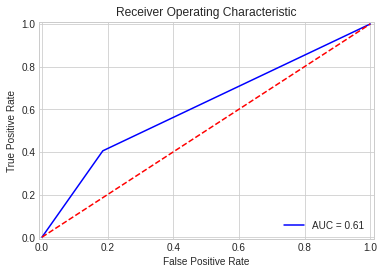

In [53]:
plot_roc_curve(y_test, probs_dt)

In [54]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 93.45 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.794 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 12}

Model with rank: 2
Mean validation score: 0.794 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 6, 'min_samples_split': 18}

Model with rank: 3
Mean validation score: 0.782 (std: 0.005)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 8, 'min_samples_split': 6}

Model with rank: 4
Mean validation score: 0.778 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 16}

Model with rank: 5
Mean validation score: 0.778 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'en

In [55]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 78.0
Accuracy CV 10-Fold: 78.89
Running Time: 0:00:27.783196


In [56]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_rf))
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     27992
           1       0.60      0.27      0.37      8458

    accuracy                           0.79     36450
   macro avg       0.71      0.61      0.62     36450
weighted avg       0.76      0.79      0.76     36450

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      3107
           1       0.56      0.24      0.34       943

    accuracy                           0.78      4050
   macro avg       0.68      0.59      0.60      4050
weighted avg       0.75      0.78      0.75      4050



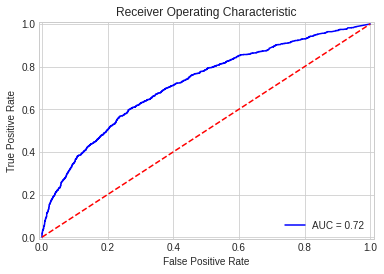

In [78]:
plot_roc_curve(y_test, probs_rf)

In [58]:
# Gradient Boosting Classifier
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 81.26
Accuracy CV 10-Fold: 81.25
Running Time: 0:06:35.963246


In [79]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_gbt))
print(metrics.classification_report(y_test, test_pred_gbt))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27992
           1       0.68      0.37      0.47      8458

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3107
           1       0.70      0.35      0.46       943

    accuracy                           0.81      4050
   macro avg       0.76      0.65      0.67      4050
weighted avg       0.80      0.81      0.79      4050



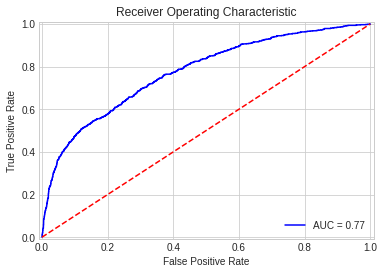

In [77]:
plot_roc_curve(y_test, probs_gbt)

### Part I: Machine Learning - Model Evaluation

In [80]:
# Compare all the models with their respective accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Accuracy Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
7,Gradient Boosting Classifier,81.26
2,Random Forest,78.00
1,Logistic Regression,76.59
5,Linear SVC,73.21
6,Decision Tree,71.93
0,KNN,70.07
3,Naive Bayes,59.38
4,Stochastic Gradient Descent,58.35


In [81]:
# Compare all the models with their respective accuracy scores using 10-CV
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Accuracy Score (10-CV)': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
models.sort_values(by='Accuracy Score (10-CV)', ascending=False)

,Model,Accuracy Score (10-CV)
7,Gradient Boosting Classifier,81.25
2,Random Forest,78.89
1,Logistic Regression,76.77
6,Decision Tree,71.33
0,KNN,70.03
5,Linear SVC,66.44
3,Naive Bayes,60.43
4,Stochastic Gradient Descent,50.39


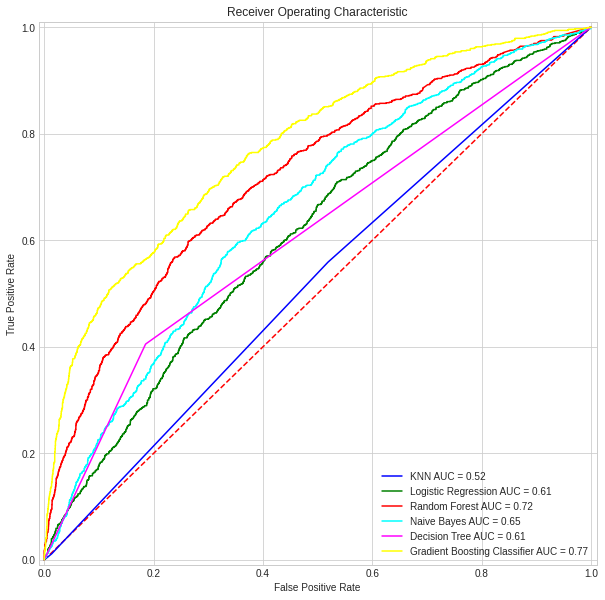

In [82]:
# Plot all the models to compare their ROC
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Classifier'
]

probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]

colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

### Part J: Preparing the test set for prediction

In [83]:
# We repeat the data-processing, data wrangling steps here again and there is a reason
# why we chose to keep functions for those tasks as it can be replicated easily for test set

# Records - rows and columns
df_test.shape

# We see that there is one column less than our training dataset above as we have to predict 'fail_7' category

(4500, 54)

In [84]:
# Check for total null values
df_test.isnull().values.sum()

3980

In [85]:
# Null or NAs by column
naColumns = df_test.isnull().sum()

# Sort for top 20 with NAs
naColumns.sort_values()

deviceid                         0
discharging_rate_lag5            0
discharging_rate_lag6            0
charging_rate_lag4               0
charging_rate_lag5               0
charging_rate_lag6               0
chargecycles                     0
dischargecycles                  0
discharging_rate_lag4            0
total_off_time                   0
avg_volt_change_charging         0
avg_volt_change_discharging      0
avg_time_charging                0
avg_time_discharging             0
max_voltage_day                  0
piececount                       0
cycle_time                       0
number_times_restart             0
LastRecord                       0
Date Deployed                    0
avg_time_discharging_lag4        0
discharging_rate_lag3            0
avg_time_discharging_lag3        0
avg_time_charging_lag4           0
avg_time_discharging_lag1        0
avg_time_discharging_lag2        0
avg_time_charging_lag3           0
avg_time_charging_lag2           0
avg_time_charging_la

Text(0.5, 0, 'Top 20 variables with missing values')

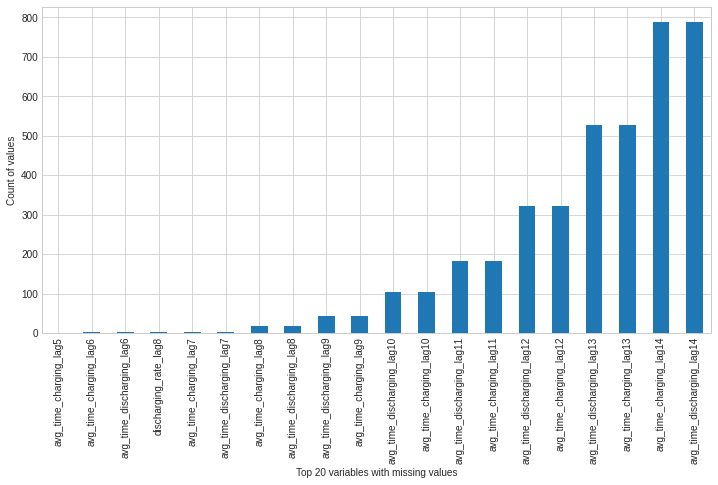

In [86]:
x = naColumns.sort_values().tail(20)

# Plot the count of missing NA values by features
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 variables with missing values')

In [87]:
# Fill the missing NAs for rows now
filling(df_test)

In [88]:
# Should show no more NAs
df_test.isnull().values.sum()

0

In [89]:
# Dropping the features which are of object type but have no use in the feature selection or modeling
del df_test['LastRecord']
del df_test['Date Deployed']

### Part K: Predicting the 'fail_7' for test.csv

In [100]:
# Dropping the unique identifier from the train set and will be used later to recognise the categorical predictions
train = df.drop(['fail_7'], axis=1)

In [101]:
# To train on 100% of training data
train_data = train
target = y

In [102]:
train_data.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,False,4.99,5.85,24.35,31.02,43.42,79.33,5.78,5.92,5.77,5.93,5.79,5.94,5.84,6.07,5.83,6.06,5.83,6.06,5.84,6.11,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,5.84,6.11,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333


In [103]:
# Picking Gradient Boosting Classifier because that was out best fit ML ago from results above
clf = GradientBoostingClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, n_jobs=-1, scoring=scoring)

In [104]:
# We expect the accuracy to be close or equal to what we got from our classification in the validation set
scoreP = round(np.mean(score)*100, 2)
print('Our Gradient Boosting Classifier score for entire training dataset is ' + str(scoreP) + '%')

Our Gradient Boosting Classifier score for entire training dataset is 81.43%


In [109]:
# Predict the class for test data on whether the 4500 news devices will fail in next 7 weeks or not
clf = GradientBoostingClassifier()
clf.fit(train_data, target)

prediction = clf.predict(df_test)

In [110]:
category_pred_fail_7 = pd.DataFrame({
    'deviceid': df_test['deviceid'],
    'fail_7': prediction
})

In [111]:
category_pred_fail_7.head(10)

,deviceid,fail_7
0,42979,1
1,14911,0
2,48386,0
3,18822,0
4,49810,0
5,23495,0
6,30555,1
7,18316,0
8,17929,0
9,33374,0


In [112]:
# The result can be saved in csv with the following code:
# NOTE: If using Google Colab like here then the results will be save locally here under '/contents'
category_pred_fail_7.to_csv('pb_challenge_prediction.csv', index=False)

In [ ]:
#### XGBoost

In [113]:
from xgboost import XGBClassifier

In [ ]:
# XGBoost Classifier
start_time = time.time()
train_pred_xgb, test_pred_xgb, acc_xgb, acc_cv_xgb, probs_xgb = fit_ml_algo(XGBClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
xgb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time))

Accuracy: 81.36
Accuracy CV 10-Fold: 81.31
Running Time: 0:01:13.770071


In [ ]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_xgb))
print(metrics.classification_report(y_test, test_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27992
           1       0.68      0.37      0.48      8458

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3107
           1       0.70      0.35      0.47       943

    accuracy                           0.81      4050
   macro avg       0.76      0.65      0.68      4050
weighted avg       0.80      0.81      0.79      4050

